In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
## Check the proportion of 0 and 1 in Churn label
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Churn', ylabel='count'>

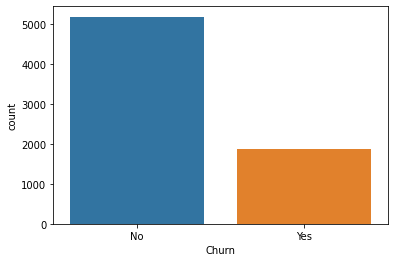

In [5]:
import seaborn as sns
sns.countplot(df["Churn"])

In [6]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']=="No")] 
df_minority = df[(df['Churn']=="Yes")] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5174, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [7]:
df_upsampled["Churn"].value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [8]:
df = df[["gender", "SeniorCitizen", "tenure", "Contract", "MonthlyCharges", "TotalCharges", "Churn"]]

In [9]:
df.loc[df["Churn"] == "No", "Churn"] = 0
df.loc[df["Churn"] == "Yes", "Churn"] = 1

In [10]:
df.head()

,gender,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,Month-to-month,29.85,29.85,0
1,Male,0,34,One year,56.95,1889.5,0
2,Male,0,2,Month-to-month,53.85,108.15,1
3,Male,0,45,One year,42.30,1840.75,0
4,Female,0,2,Month-to-month,70.70,151.65,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   SeniorCitizen   7043 non-null   int64  
 2   tenure          7043 non-null   int64  
 3   Contract        7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   object 
 6   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 385.3+ KB


In [12]:
df =df[~(df["TotalCharges"]== " ")]

In [13]:
df["MonthlyCharges"] = df["MonthlyCharges"].astype("float")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df["Churn"] = df["Churn"].astype("int")

In [14]:
#one hot encoding
df = pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,1,1,0,0
3,0,45,42.30,1840.75,0,0,1,0,1,0
4,0,2,70.70,151.65,1,1,0,1,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7032 non-null   int64  
 1   tenure                   7032 non-null   int64  
 2   MonthlyCharges           7032 non-null   float64
 3   TotalCharges             7032 non-null   float64
 4   Churn                    7032 non-null   int32  
 5   gender_Female            7032 non-null   uint8  
 6   gender_Male              7032 non-null   uint8  
 7   Contract_Month-to-month  7032 non-null   uint8  
 8   Contract_One year        7032 non-null   uint8  
 9   Contract_Two year        7032 non-null   uint8  
dtypes: float64(2), int32(1), int64(2), uint8(5)
memory usage: 336.5 KB


In [16]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [17]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [18]:
## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

In [20]:
## Decision Tree

In [21]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [22]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_6 <= 0.50
|   |--- feature_2 <= 93.67
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_2 <= 92.42
|   |   |   |   |--- feature_3 <= 2447.30
|   |   |   |   |   |--- feature_2 <= 19.77
|   |   |   |   |   |   |--- feature_2 <= 19.73
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  19.73
|   |   |   |   |   |   |   |--- feature_1 <= 49.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  49.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 55.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  55.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  19.77
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  2447.30
|   |   |   |   |   |--- feature_3 <= 2460.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  2460.35
|   |   |   |   |   |   |--- feature_1 <= 

In [23]:
## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [25]:
## Hyperparameter Tuning

In [26]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [27]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [28]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.6min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [29]:
grid_search.best_score_

0.8001895284944738

In [30]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [31]:
## Evaluation

In [32]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf = rf_best.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_rf))

0.7856381087806612
0.7319587628865979
0.7867045858514042


In [34]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))
print(precision_score(y_test, y_dtree, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

0.7265091994731999
0.6583158236552566
0.7275988450769413


In [35]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))
print(recall_score(y_test, y_dtree, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))

0.6877309629552899
0.6609745439007653
0.6922942212324067


In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))

[[1852  213]
 [ 390  358]]
[[1678  387]
 [ 367  381]]
[[1846  219]
 [ 381  367]]


In [37]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.6877309629552899
0.6609745439007653
0.6922942212324067


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2065
           1       0.63      0.48      0.54       748

    accuracy                           0.79      2813
   macro avg       0.73      0.69      0.70      2813
weighted avg       0.77      0.79      0.78      2813

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2065
           1       0.50      0.51      0.50       748

    accuracy                           0.73      2813
   macro avg       0.66      0.66      0.66      2813
weighted avg       0.73      0.73      0.73      2813

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2065
           1       0.63      0.49      0.55       748

    accuracy                           0.79      2813
   macro avg       0.73      0.69      0.71      2813
weighted avg       0.78      0.79      0.78      2813

